# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

C:\Users\dgsid\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [83]:
df = pd.read_csv(r"C:\Users\dgsid\Downloads\Thermal Dogs and People\train\_annotations.csv")
df = shuffle(df)
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
128,IMG_0104_jpg.rf.b5469c530e0c52eaa12c031fe354aa...,416,416,dog,295,234,405,387
143,IMG_0052_jpg.rf.e3601e18359fb571b073c4fcfbadbe...,416,416,dog,168,26,385,395
156,IMG_0006 2_jpg.rf.ebb7bc29f5046513f04ba52fa0ca...,416,416,dog,220,115,308,322
167,IMG_0013 2_jpg.rf.f0a4b85b15ea5828ad8e26d2ee44...,416,416,person,194,156,233,253
61,IMG_0057_jpg.rf.4c70b90c7846ee9ce3b879c93336dd...,416,416,dog,158,177,328,412


<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">
    
 * This dataset is mostly a practice and training aspect for the subject of YOLO. The data is labeled with 5 classes.
 * classic_id labels: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'

In [84]:
classes = df['class'].unique()
print(classes)

['dog' 'person']


In [85]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [87]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = r'C:/Users/dgsid/Downloads/Thermal Dogs and People/train/'

for class_id in classes:
    first_row = df[df['class'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['filename'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

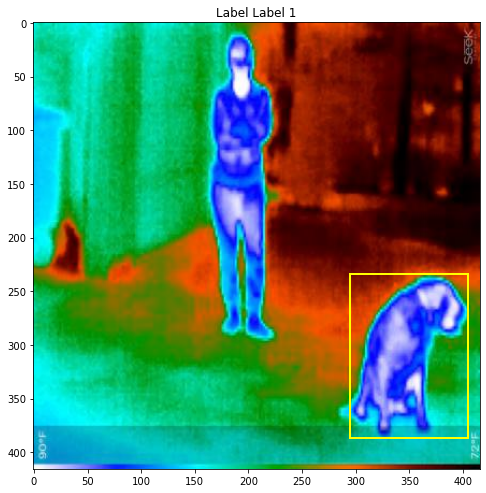

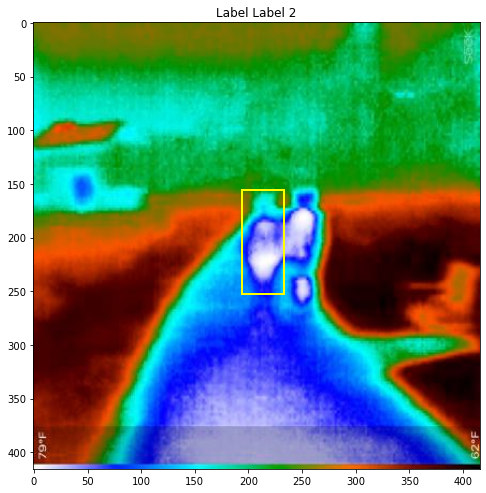

In [88]:
# Assuming classes is a list of unique class names
classes = df['class'].unique()

# Create a dictionary to map each class to a label
labels = {class_name: f"Label {index}" for index, class_name in enumerate(classes, start=1)}

for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [29]:
!pip install ultralytics

  Using cached ultralytics-8.2.14-py3-none-any.whl (756 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)


In [89]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [90]:
model = YOLO("yolov8m.pt")



In [98]:
results=model.predict(source=r"C:\Users\dgsid\Downloads\Thermal Dogs and People\train",
              save=True, conf=0.2,iou=0.5)


image 1/142 C:\Users\dgsid\Downloads\Thermal Dogs and People\train\IMG_0001 2_jpg.rf.a64c70befa56fe10f85e72fee63c4c01.jpg: 640x640 (no detections), 1827.1ms
image 2/142 C:\Users\dgsid\Downloads\Thermal Dogs and People\train\IMG_0001 4_jpg.rf.4602a05ba82cd5424af446c094c58f59.jpg: 640x640 2 traffic lights, 1771.1ms
image 3/142 C:\Users\dgsid\Downloads\Thermal Dogs and People\train\IMG_0001_jpg.rf.c609b93c832da7d81cd342c414c8fe35.jpg: 640x640 (no detections), 1770.4ms
image 4/142 C:\Users\dgsid\Downloads\Thermal Dogs and People\train\IMG_0002 2_jpg.rf.b591a520d7e4532ea310fec86b8c3f02.jpg: 640x640 1 person, 1795.2ms
image 5/142 C:\Users\dgsid\Downloads\Thermal Dogs and People\train\IMG_0002 3_jpg.rf.5926b8d930f26a31af2f4e446163c016.jpg: 640x640 1 cat, 1791.5ms
image 6/142 C:\Users\dgsid\Downloads\Thermal Dogs and People\train\IMG_0003 3_jpg.rf.440d55075470010e5c2668c8d77f42d4.jpg: 640x640 (no detections), 1693.2ms
image 7/142 C:\Users\dgsid\Downloads\Thermal Dogs and People\train\IMG_0003

In [109]:
# Iterate over each result in the list
for detection in results[:30]:
    # Access the boxes attribute for each result
    boxes = detection.boxes
    # Process the boxes as needed


In [111]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [113]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [290.3956298828125, 246.77149963378906, 303.05706787109375, 273.2702331542969]
Probability: 0.28112322092056274


In [114]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: person
Coordinates: [290, 247, 303, 273]
Probability: 0.28
---


In [116]:
results1 = model.predict(source=r"C:\Users\dgsid\Downloads\Thermal Dogs and People\test",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/20 C:\Users\dgsid\Downloads\Thermal Dogs and People\test\IMG_0002 4_jpg.rf.6d1c60bf9f8779f13291c0547ea1ff70.jpg: 640x640 1 person, 1 tv, 1618.7ms
image 2/20 C:\Users\dgsid\Downloads\Thermal Dogs and People\test\IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg: 640x640 1 person, 1733.4ms
image 3/20 C:\Users\dgsid\Downloads\Thermal Dogs and People\test\IMG_0009_jpg.rf.ecdb212f7d7796e682a87e2e1d6e907e.jpg: 640x640 1 kite, 1770.6ms
image 4/20 C:\Users\dgsid\Downloads\Thermal Dogs and People\test\IMG_0012 2_jpg.rf.4c8e033ea0189ebd28c4e3751edd7a6a.jpg: 640x640 1 person, 1641.0ms
image 5/20 C:\Users\dgsid\Downloads\Thermal Dogs and People\test\IMG_0022_jpg.rf.c89662890a0f5d8a915677ed21165d2b.jpg: 640x640 1 horse, 1681.4ms
image 6/20 C:\Users\dgsid\Downloads\Thermal Dogs and People\test\IMG_0023 3_jpg.rf.ac45d9a3e591d1377f50b25c2415a5b7.jpg: 640x640 2 cakes, 1811.6ms
image 7/20 C:\Users\dgsid\Downloads\Thermal Dogs and People\test\IMG_0024 2_jpg.rf.7f92f2bd29719c59c66c307fe5c3df

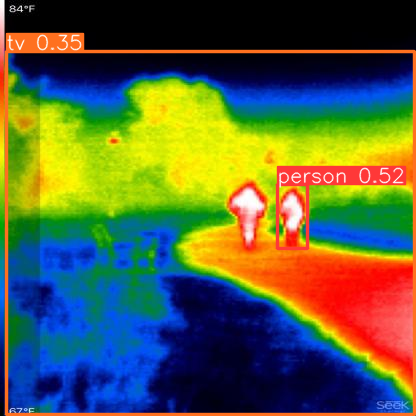

In [121]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))